In [46]:
import pandas as pd

# Load the data with proper delimiter
mat_data = pd.read_csv('C:/Users/hkesa/Desktop/student-mat.csv', delimiter=';')
por_data = pd.read_csv('C:/Users/hkesa/Desktop/student-por.csv', delimiter=';')

# Display the first few rows of each dataset
mat_head = mat_data.head()
por_head = por_data.head()

# Detailed information about the datasets
mat_info = mat_data.info()
por_info = por_data.info()

mat_head, por_head, mat_info, por_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

(  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
 0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
 1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
 2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
 3     GP   F   15       U     GT3       T     4     2   health  services  ...   
 4     GP   F   16       U     GT3       T     3     3    other     other  ...   
 
   famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
 0      4        3      4     1     1      3        6   5   6   6  
 1      5        3      3     1     1      3        4   5   5   6  
 2      4        3      2     2     3      3       10   7   8  10  
 3      3        2      2     1     1      5        2  15  14  15  
 4      4        3      2     1     2      5        4   6  10  10  
 
 [5 rows x 33 columns],
   school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjo

In [47]:
# Selecting only the demographic and basic information for merging
base_columns = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu']

# Merging the datasets on the selected base columns
merged_data = pd.merge(mat_data, por_data, on=base_columns, suffixes=('_mat', '_por'))

# Display the first few rows and the information of the merged dataset
merged_head = merged_data.head()
merged_info = merged_data.info()

merged_head, merged_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 58 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   school          962 non-null    object
 1   sex             962 non-null    object
 2   age             962 non-null    int64 
 3   address         962 non-null    object
 4   famsize         962 non-null    object
 5   Pstatus         962 non-null    object
 6   Medu            962 non-null    int64 
 7   Fedu            962 non-null    int64 
 8   Mjob_mat        962 non-null    object
 9   Fjob_mat        962 non-null    object
 10  reason_mat      962 non-null    object
 11  guardian_mat    962 non-null    object
 12  traveltime_mat  962 non-null    int64 
 13  studytime_mat   962 non-null    int64 
 14  failures_mat    962 non-null    int64 
 15  schoolsup_mat   962 non-null    object
 16  famsup_mat      962 non-null    object
 17  paid_mat        962 non-null    object
 18  activities

(  school sex  age address famsize Pstatus  Medu  Fedu Mjob_mat Fjob_mat  ...  \
 0     GP   F   18       U     GT3       A     4     4  at_home  teacher  ...   
 1     GP   F   17       U     GT3       T     1     1  at_home    other  ...   
 2     GP   F   17       U     GT3       T     1     1  at_home    other  ...   
 3     GP   F   17       U     GT3       T     1     1  at_home    other  ...   
 4     GP   F   17       U     GT3       T     1     1  at_home    other  ...   
 
   famrel_por freetime_por  goout_por  Dalc_por  Walc_por health_por  \
 0          4            3          4         1         1          3   
 1          5            3          3         1         1          3   
 2          5            3          3         1         1          3   
 3          4            4          4         1         3          1   
 4          4            3          4         1         1          5   
 
   absences_por G1_por G2_por G3_por  
 0            4      0     11     11  


In [48]:
columns_to_remove = ['Mjob_mat', 'Fjob_mat', 'reason_mat', 'guardian_mat', 
                     'Mjob_por', 'Fjob_por', 'reason_por', 'guardian_por']
cleaned_data = merged_data.drop(columns=columns_to_remove)

cleaned_data.head()

# Adjusted list of categorical columns with correct suffixes
categorical_columns = ['school', 'sex', 'address', 'famsize', 'Pstatus', 
                       'schoolsup_mat', 'famsup_mat', 'paid_mat', 'activities_mat', 'nursery_mat', 'higher_mat', 'internet_mat', 'romantic_mat',
                       'schoolsup_por', 'famsup_por', 'paid_por', 'activities_por', 'nursery_por', 'higher_por', 'internet_por', 'romantic_por']

# Apply one-hot encoding to the categorical columns
cleaned_data = pd.get_dummies(cleaned_data, columns=categorical_columns, drop_first=True)

# Display the first few rows of the newly encoded data to confirm the changes
cleaned_data.head()


,age,Medu,Fedu,traveltime_mat,studytime_mat,failures_mat,famrel_mat,freetime_mat,goout_mat,Dalc_mat,...,internet_mat_yes,romantic_mat_yes,schoolsup_por_yes,famsup_por_yes,paid_por_yes,activities_por_yes,nursery_por_yes,higher_por_yes,internet_por_yes,romantic_por_yes
0,18,4,4,2,2,0,4,3,4,1,...,False,False,True,False,False,False,True,True,False,False
1,17,1,1,1,2,0,5,3,3,1,...,True,False,False,True,False,False,False,True,True,False
2,17,1,1,1,2,0,5,3,3,1,...,True,False,False,False,False,True,True,True,True,False
3,17,1,1,1,2,0,5,3,3,1,...,True,False,False,True,False,False,False,True,False,False
4,17,1,1,1,2,0,5,3,3,1,...,True,False,False,True,False,True,True,True,False,True


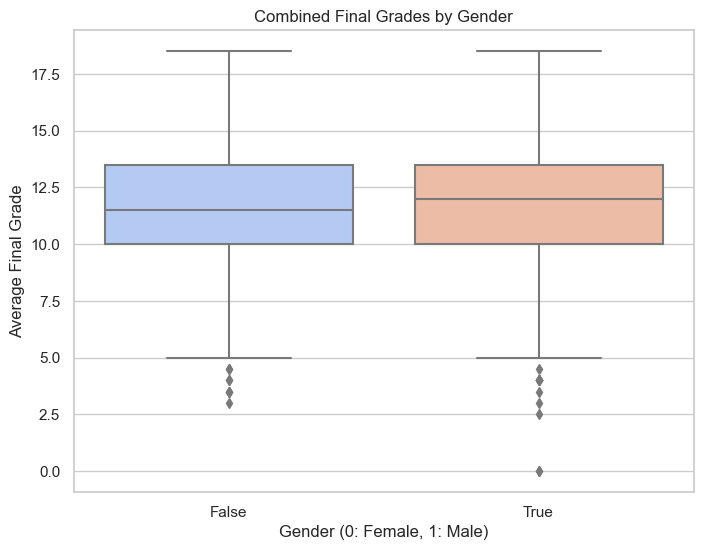

In [49]:
from IPython.display import HTML
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average of the final grades from both Math and Portuguese
cleaned_data['G3_avg'] = (cleaned_data['G3_mat'] + cleaned_data['G3_por']) / 2

# HTML formatted text for visualization explanation
html_gender_grades = """
<h3>Purpose of Visualization</h3>
<p><strong>Purpose:</strong> To observe gender differences in academic performance across combined subjects.</p>
<p><strong>Example:</strong> Comparing final grades between male and female students using average final grades from both math and Portuguese.</p>
"""

# Display HTML in the Jupyter Notebook
display(HTML(html_gender_grades))

# Visualization code
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex_M', y='G3_avg', data=cleaned_data, palette='coolwarm')
plt.title('Combined Final Grades by Gender')
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Average Final Grade')
plt.show()


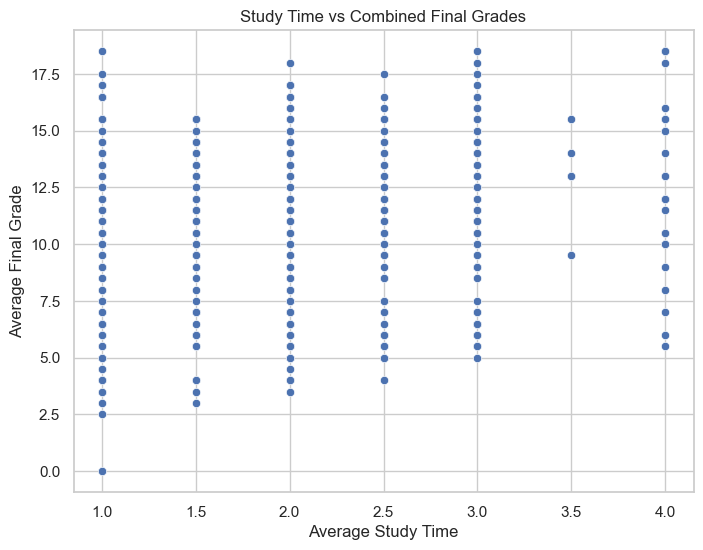

In [50]:
html_studytime_comparison = """
<h3>Purpose of Visualization</h3>
<p><strong>Purpose:</strong> To analyze the impact of study time on combined final grades.</p>
<p><strong>Example:</strong> Plotting average study time against combined final grades to see correlations.</p>
"""

display(HTML(html_studytime_comparison))

# Calculate the average study time from both subjects
cleaned_data['studytime_avg'] = (cleaned_data['studytime_mat'] + cleaned_data['studytime_por']) / 2

# Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x='studytime_avg', y='G3_avg', data=cleaned_data)
plt.title('Study Time vs Combined Final Grades')
plt.xlabel('Average Study Time')
plt.ylabel('Average Final Grade')
plt.show()


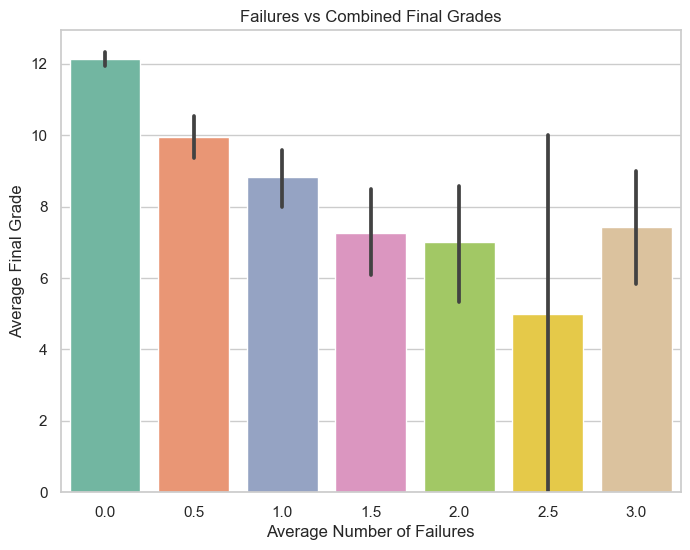

In [51]:
html_failures_grades = """
<h3>Purpose of Visualization</h3>
<p><strong>Purpose:</strong> To explore how the number of failures impacts students' combined final grades.</p>
<p><strong>Example:</strong> Assessing the correlation between the average number of failures and combined final grades.</p>
"""

display(HTML(html_failures_grades))

# Calculate the average number of failures from both subjects
cleaned_data['failures_avg'] = (cleaned_data['failures_mat'] + cleaned_data['failures_por']) / 2

# Visualization
plt.figure(figsize=(8, 6))
sns.barplot(x='failures_avg', y='G3_avg', data=cleaned_data, palette='Set2')
plt.title('Failures vs Combined Final Grades')
plt.xlabel('Average Number of Failures')
plt.ylabel('Average Final Grade')
plt.show()

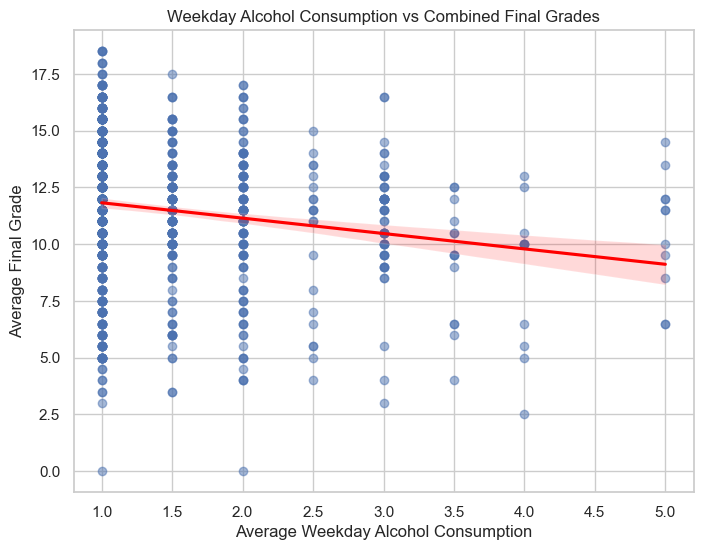

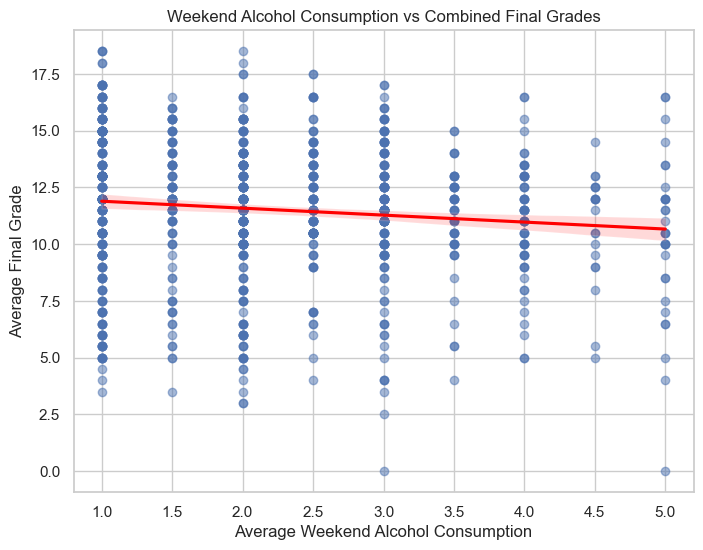

In [52]:
html_alcohol_grades = """
<h3>Purpose of Visualization</h3>
<p><strong>Purpose:</strong> To determine the effect of alcohol consumption on academic performance.</p>
<p><strong>Example:</strong> Analyzing weekday and weekend alcohol consumption levels against combined final grades.</p>
"""

display(HTML(html_alcohol_grades))

# Calculate the average alcohol consumption from both subjects
cleaned_data['Dalc_avg'] = (cleaned_data['Dalc_mat'] + cleaned_data['Dalc_por']) / 2
cleaned_data['Walc_avg'] = (cleaned_data['Walc_mat'] + cleaned_data['Walc_por']) / 2

# Visualization
plt.figure(figsize=(8, 6))
sns.regplot(x='Dalc_avg', y='G3_avg', data=cleaned_data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Weekday Alcohol Consumption vs Combined Final Grades')
plt.xlabel('Average Weekday Alcohol Consumption')
plt.ylabel('Average Final Grade')
plt.show()

plt.figure(figsize=(8, 6))
sns.regplot(x='Walc_avg', y='G3_avg', data=cleaned_data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Weekend Alcohol Consumption vs Combined Final Grades')
plt.xlabel('Average Weekend Alcohol Consumption')
plt.ylabel('Average Final Grade')
plt.show()


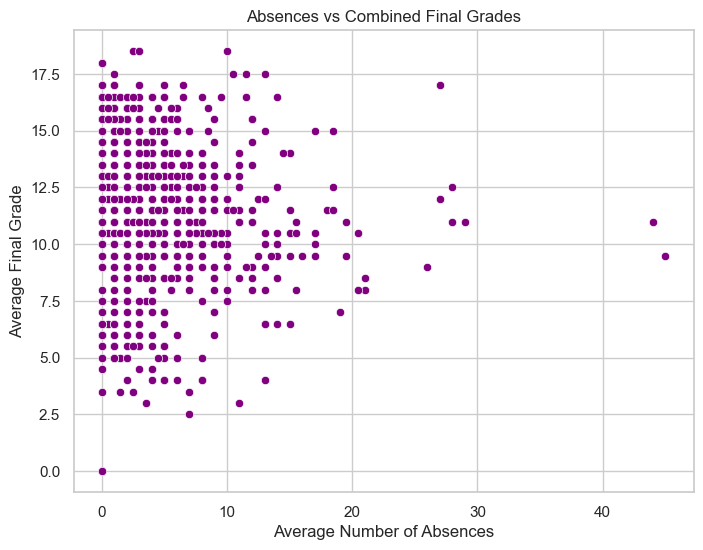

In [53]:
html_absences_grades = """
<h3>Purpose of Visualization</h3>
<p><strong>Purpose:</strong> To observe the impact of student absences on their combined final grades.</p>
<p><strong>Example:</strong> Visualizing the relationship between the average number of absences and combined final grades.</p>
"""

display(HTML(html_absences_grades))

# Calculate the average number of absences from both subjects
cleaned_data['absences_avg'] = (cleaned_data['absences_mat'] + cleaned_data['absences_por']) / 2

# Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x='absences_avg', y='G3_avg', data=cleaned_data, color='purple')
plt.title('Absences vs Combined Final Grades')
plt.xlabel('Average Number of Absences')
plt.ylabel('Average Final Grade')
plt.show()


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Independent variables (features)
X = cleaned_data.drop(columns=['G3_avg'])

# Dependent variable (target)
y = cleaned_data['G3_avg']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Display the shapes of the splits
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((769, 55), (193, 55), (769,), (193,))

In [55]:
# Create the linear regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)


LinearRegression()

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Display the performance metrics
mae, mse, rmse


(4.353454844747764e-15, 3.4873374317853227e-29, 5.905368262678732e-15)

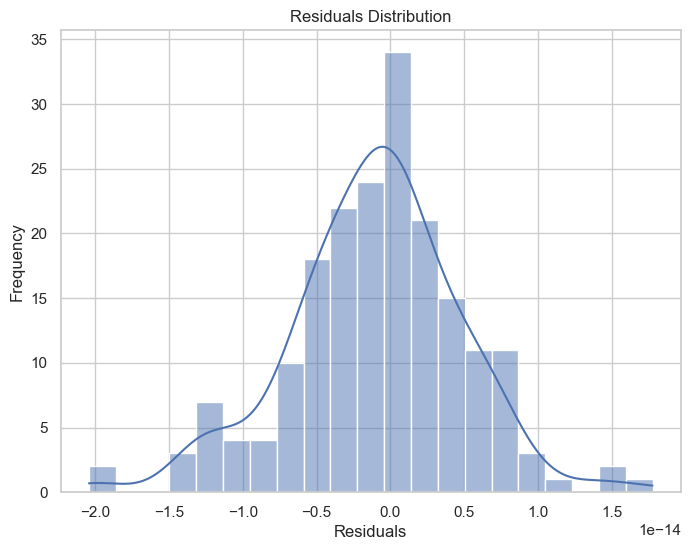

In [57]:
html_residuals_distribution = """
<h3>Residuals Distribution</h3>
<p><strong>Comment:</strong> This histogram shows the distribution of the residuals, which are the differences between the actual and predicted values. The residuals exhibit a symmetric distribution and are concentrated around the center. This indicates that the prediction errors are generally small and the predictions are mostly close to the actual values. The symmetric distribution of residuals suggests that the linear regression assumptions are well met, and the prediction errors are randomly distributed.</p>
"""

display(HTML(html_residuals_distribution))

# Visualization Code
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.show()


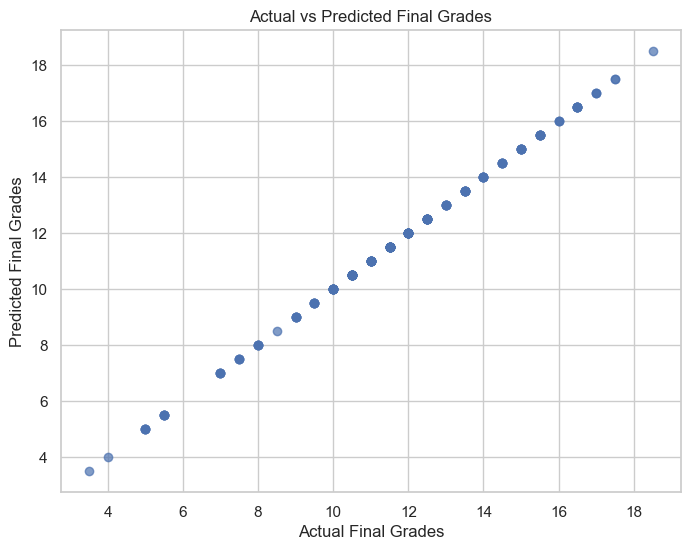

In [58]:
html_actual_vs_predicted = """
<h3>Actual vs Predicted Final Grades</h3>
<p><strong>Comment:</strong> The graph shows the relationship between the actual final grades and the predicted final grades using the linear regression model. The points on the graph exhibit an almost perfect linear relationship, indicating that the model's predictions are very close to the actual values. This suggests that the model performs exceptionally well on both the training and test datasets, making nearly error-free predictions.</p>
"""

display(HTML(html_actual_vs_predicted))

# Visualization Code
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.xlabel('Actual Final Grades')
plt.ylabel('Predicted Final Grades')
plt.title('Actual vs Predicted Final Grades')
plt.show()


In [59]:
from sklearn.metrics import r2_score

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Display the performance metrics
performance_metrics = f"""
<h3>Model Performance Metrics</h3>
<p><strong>Mean Absolute Error (MAE):</strong> {mae}</p>
<p><strong>Mean Squared Error (MSE):</strong> {mse}</p>
<p><strong>Root Mean Squared Error (RMSE):</strong> {rmse}</p>
<p><strong>R^2 Score:</strong> {r2}</p>
"""

display(HTML(performance_metrics))


In [60]:
html_evaluation_commentary = """
<h3>Evaluation and Commentary</h3>
<p>The model shows almost perfect performance metrics with an R² score of 1.0 and error metrics (MAE, MSE, RMSE) close to zero. This indicates that the model's predictions almost perfectly match the actual values.</p>
<p>These results can usually occur due to the following reasons:</p>
<ol>
    <li><strong>Model Overfitting:</strong> The model has fit the training data excessively well and is predicting the test data perfectly. In this case, the model may not generalize well to real-world data.</li>
    <li><strong>Data Structure Issue:</strong> There might be an extremely obvious relationship between the independent and dependent variables in the dataset, or there might be an error in the data.</li>
    <li><strong>Model Accuracy:</strong> The model genuinely performs exceptionally well on the training and test data.</li>
</ol>
<h4>R² Score and Error Metrics:</h4>
<ul>
    <li><strong>Mean Absolute Error (MAE):</strong> Measures the average magnitude of the errors in a set of predictions, without considering their direction. Being close to 0 indicates that the model's predictions are very accurate.</li>
    <li><strong>Mean Squared Error (MSE):</strong> Measures the average of the squares of the errors—that is, the average squared difference between the estimated values and what is estimated. Being close to 0 indicates that the model is not making large errors.</li>
    <li><strong>Root Mean Squared Error (RMSE):</strong> The square root of the average of squared differences between prediction and actual observation. Being close to 0 indicates that the errors are small and the model performs well.</li>
    <li><strong>R² Score:</strong> A statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. An R² score of 1.0 indicates that the model explains all the variance and fits perfectly.</li>
</ul>

"""

display(HTML(html_evaluation_commentary))
